# ADS Assignment 2 - Logistic Regression | Diabetes Classifications

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score


### Load data


### About the Data 

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105/main/dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [4]:
print(df.shape)

(303, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


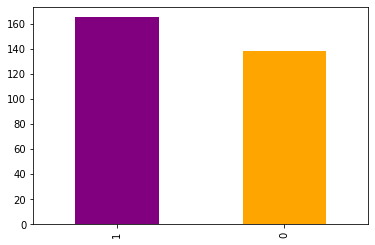

In [7]:
df['output'].value_counts().plot(kind='bar', color=[ 'purple', 'orange']);

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:>

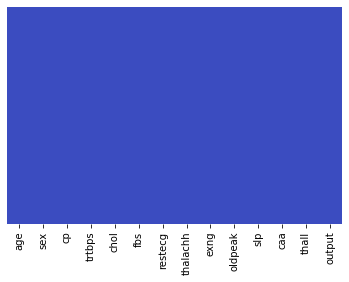

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

<AxesSubplot:xlabel='output', ylabel='count'>

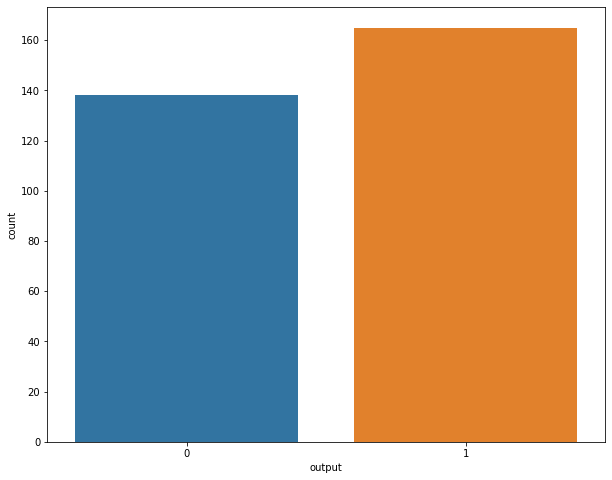

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x='output',data=df)

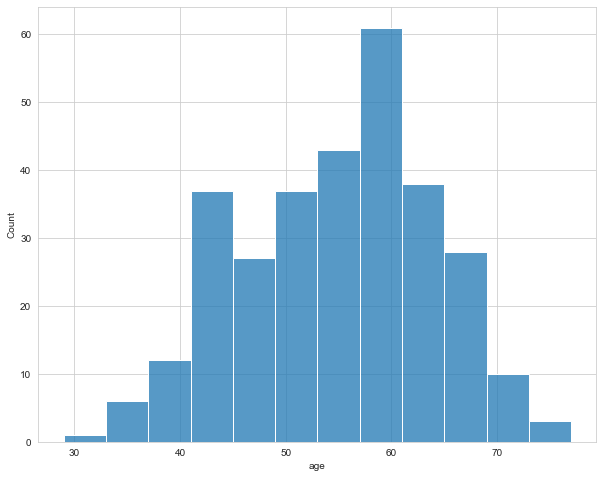

In [11]:
# Plot for Age
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.histplot(df.age);



### Age vs. Max Heart Rate for Heart Disease

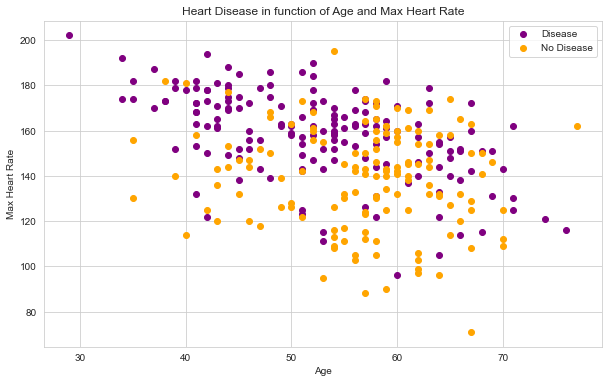

In [12]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.output==1],
            df.thalachh[df.output==1],
            c="purple")

# Scatter with negative examples
plt.scatter(df.age[df.output==0],
            df.thalachh[df.output==0],
            c="orange")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

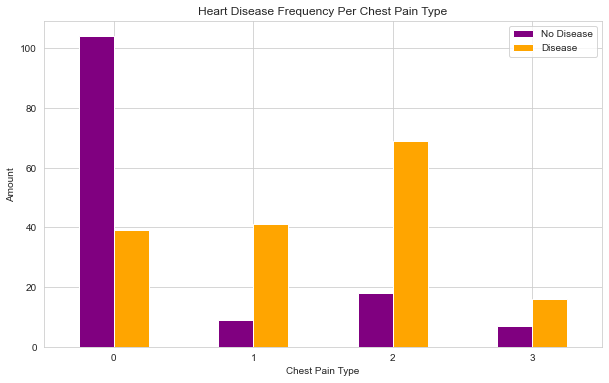

In [13]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.output).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["purple", "orange"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

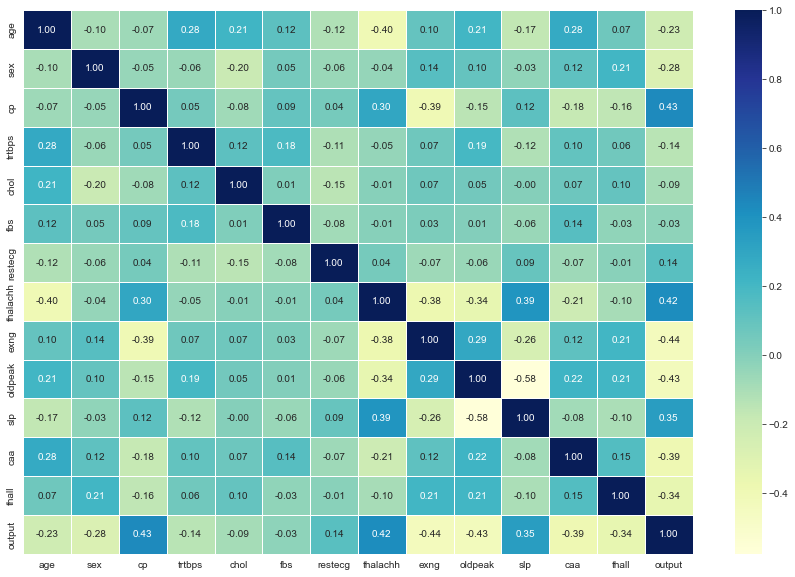

In [14]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu");

<AxesSubplot:xlabel='age', ylabel='thalachh'>

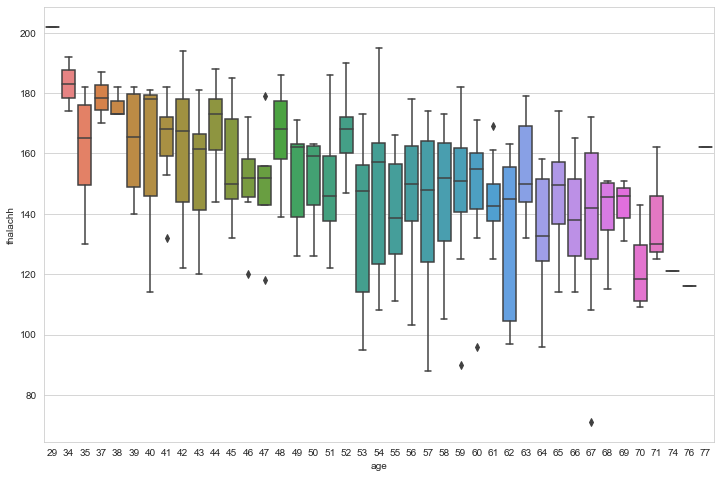

In [15]:
plt.subplots(figsize=(12,8))
sns.boxplot(x='age', y='thalachh', data=df,palette='husl')

In [16]:
train_data = df.sample(frac=0.8, random_state=25)
test_data = df.drop(train_data.index)
print(f"Number of testing examples: {test_data.shape[0]}")
print(f"Number of training examples: {train_data.shape[0]}")

Number of testing examples: 61
Number of training examples: 242


In [17]:
train_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1


In [18]:
test_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1


In [19]:
x_train_data = train_data.drop('output',axis=1)
y_train_data = train_data['output']

In [20]:
x_train_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2


In [21]:
x_test_data = test_data.drop('output',axis=1)
y_test_data = test_data['output']

In [22]:
x_test_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2


In [23]:
y_test_data.head()

2     1
13    1
14    1
22    1
36    1
Name: output, dtype: int64

In [24]:
X_train_data = x_train_data.to_numpy()
Y_train_data = y_train_data.to_numpy()

Y_train_data = Y_train_data.reshape(Y_train_data.shape[0],)

X_test_data = x_test_data.to_numpy()
Y_test_data = y_test_data.to_numpy()
Y_test_data = Y_test_data.reshape(Y_test_data.shape[0],)

In [25]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [26]:
def gradients(X, y, y_hat):   
    m = X.shape[0]
    dweight = (1/m)*np.dot(X.T, (y_hat - y))
    dbias = (1/m)*np.sum((y_hat - y))   
    return dweight, dbias

In [27]:
def normalize(X):   
    m, n = X.shape    
    for i in range(n):
        Xnorm = (X - X.mean(axis=0))/X.std(axis=0)       
    return Xnorm

In [28]:
def sigmoid(X):
    return 1.0/(1 + np.exp(-X))

In [29]:
def relu(x): 
    return np.maximum(0,x)

In [30]:
def accuracy_score(ytrue, ypred):
        accscore = np.sum(np.equal(ytrue, ypred)) / len(ytrue)
        return accscore

In [31]:
def f1(ytrue, ypred):
    tp = np.sum(np.multiply([i==True for i in ypred], ytrue))
    tn = np.sum(np.multiply([i==False for i in ypred], [not(j) for j in ytrue]))
    fp = np.sum(np.multiply([i==True for i in ypred], [not(j) for j in ytrue]))
    fn = np.sum(np.multiply([i==False for i in ypred], ytrue))
    prec = tp/(tp+fp)
    recall = tp/(tp+fn)
    if prec != 0 and recall != 0:
        print('prec', prec)
        print('recall', recall)
        f1 = (2 * prec * recall) / (prec + recall)
    else:
        f1 = 0
    return f1

In [32]:
def train(X, y,activation_func, bs, epochs, lr):
    

    m, n = X.shape
    weight = np.zeros((n,1))
    bias = 0
    y = y.reshape(m,1)   
    xnorm = normalize(X)   
    loss1 = []   
    accuracy = []
    

    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            if activation_func == 'sigmoid':
                y_hat = sigmoid(np.dot(xb, weight) + bias)
            elif activation_func == 'Relu':
                y_hat = relu(np.dot(xb, weight) + bias)

            dw, db = gradients(xb, yb, y_hat)
            

            weight -= lr*dw
            bias -= lr*db
        
        if activation_func == 'sigmoid':
            l = loss(y, sigmoid(np.dot(X, weight) + bias))
        elif activation_func == 'Relu':
            l = loss(y, relu(np.dot(X, weight) + bias))
        loss1.append(l)
        
        accuracy1 = accuracy_score(yb, y_hat)
        accuracy.append(accuracy1)
        
    return weight, bias, accuracy

In [33]:
def train_with_regularization(X, y,activation_func,regularization,lambda_, bs, epochs, lr):
    

    m, n = X.shape
    weight = np.zeros((n,1))
    bias = 0
    
    y = y.reshape(m,1)  
    x = normalize(X)
    
    losses = []
    
    accuracies = []
    
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            if activation_func == 'sigmoid':
                y_hat = sigmoid(np.dot(xb, weight) + bias)
            elif activation_func == 'Relu':
                y_hat = relu(np.dot(xb, weight) + bias)

            dw, db = gradients(xb, yb, y_hat)
            
            if(regularization=="L1"):
                signs=np.where(weight>0,1,-1)
                dw = dw + signs * lambda_
                
            elif(regularization=="L2"):
                dw = dw + lambda_ * weight * 2

            weight -= lr*dw
            bias -= lr*db

        if activation_func == 'sigmoid':
            l = loss(y, sigmoid(np.dot(X, weight) + bias))
        elif activation_func == 'Relu':
            l = loss(y, relu(np.dot(X, weight) + bias))
            
        reg = 0.  
        if(regularization=="L1"):
            reg= lambda_*sum(np.abs(weight))
            l = l - reg
        if(regularization=="L2"):
            reg= sum((weight**2))*lambda_
            l = l - reg
            
        losses.append(l)
        
        accuracy = accuracy_score(yb, y_hat)
        accuracies.append(accuracy)
        
    return weight, bias, accuracies

In [34]:
def predict(X, activation_func):
    
    x = normalize(X)

    if activation_func == 'sigmoid':
        preds = sigmoid(np.dot(X, weight) + bias)
    elif activation_func == 'Relu':
        preds = relu(np.dot(X, weight) + bias)
    
    pred_class = []
  
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

In [35]:

weight, bias, acc = train(X_train_data, Y_train_data,activation_func='sigmoid', bs=100, epochs=1000, lr=0.01)

C:\Users\pjgaw\AppData\Local\Temp/ipykernel_29340/4240560205.py:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\pjgaw\AppData\Local\Temp/ipykernel_29340/4240560205.py:2: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


In [36]:
ypred = predict(X_test_data,activation_func ='sigmoid')

In [37]:
test_accuracy = accuracy_score(Y_test_data, ypred)

In [38]:
test_accuracy

0.6721311475409836

In [39]:
f1_score = f1(Y_test_data, ypred)
f1_score

prec 0.8636363636363636
recall 0.5277777777777778


0.6551724137931034

In [40]:

w, b, acc_r = train(X_train_data, Y_train_data,activation_func='Relu', bs=100, epochs=1000, lr=0.001)

C:\Users\pjgaw\AppData\Local\Temp/ipykernel_29340/4240560205.py:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\pjgaw\AppData\Local\Temp/ipykernel_29340/4240560205.py:2: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\pjgaw\AppData\Local\Temp/ipykernel_29340/4240560205.py:2: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


In [41]:
y_pred = predict(X_test_data,activation_func ='Relu')
test_accuracy = accuracy_score(Y_test_data, y_pred)
test_accuracy

0.6721311475409836

In [42]:

print("Lasso training")
w, b, acc_s_l1 = train_with_regularization(X_train_data, Y_train_data,activation_func='Relu',regularization='L1',lambda_=0.001, bs=100, epochs=1000, lr=0.01)

Lasso training


C:\Users\pjgaw\AppData\Local\Temp/ipykernel_29340/4240560205.py:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\pjgaw\AppData\Local\Temp/ipykernel_29340/4240560205.py:2: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\pjgaw\AppData\Local\Temp/ipykernel_29340/4240560205.py:2: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


In [43]:
y_pred = predict(X_test_data,activation_func ='Relu')
test_accuracy = accuracy_score(Y_test_data, y_pred)
print("test_accuracy:",test_accuracy)
f1_score = f1(Y_test_data, y_pred)
print("f1_score:",f1_score)

test_accuracy: 0.6721311475409836
prec 0.8636363636363636
recall 0.5277777777777778
f1_score: 0.6551724137931034


In [44]:

print("Ridge training")
weight, bias, acc_s_l2 = train_with_regularization(X_train_data, Y_train_data,activation_func='Relu',regularization='L2',lambda_=0.01, bs=100, epochs=1000, lr=0.01)

Ridge training


C:\Users\pjgaw\AppData\Local\Temp/ipykernel_29340/4240560205.py:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\pjgaw\AppData\Local\Temp/ipykernel_29340/4240560205.py:2: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
C:\Users\pjgaw\AppData\Local\Temp/ipykernel_29340/4240560205.py:2: RuntimeWarning: invalid value encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


In [47]:
y_pred = predict(X_test_data,activation_func ='Relu')
test_accuracy = accuracy_score(Y_test_data, y_pred)
print("test_accuracy:",test_accuracy)
f1_score = f1(Y_test_data, y_pred)

print("f1_score :",f1_score)

test_accuracy: 0.4098360655737705
f1_score : 0


C:\Users\pjgaw\AppData\Local\Temp/ipykernel_29340/2614281562.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  prec = tp/(tp+fp)


In [48]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105/main/dataset/heart.csv')
df.head()
# Create X (all columns except target)
X = df.drop("output", axis=1)

# Create y (only the target column)
y = df["output"]


# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
f1_score(Y_test_data, y_pred)

TypeError: 'int' object is not callable

##  **License**

**MIT License**



 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software. 

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

Copyright (c) 2022 Pratik Gawand

## Cite:

Python, Real. “Logistic Regression in Python – Real Python.” Logistic Regression in Python – Real Python, realpython.com/logistic-regression-python. Accessed 19 Nov. 2022. 

“Logistic Regression in Python - Theory and Code Example With Explanation | ASPER BROTHERS.” ASPER BROTHERS, 25 Aug. 2021, asperbrothers.com/blog/logistic-regression-in-python.